In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
injuries = pd.read_csv("injuries.tsv", sep="\t")
products = pd.read_csv("products.tsv", sep="\t")
population = pd.read_csv("population.tsv", sep="\t")

In [3]:
# Filtering the injuries dataset for a specific product code
selected = injuries[injuries['prod_code'] == 649]
print(len(selected))

2993


In [4]:

# Counting occurrences of variables in the selected dataset
location_counts = selected.groupby('location')['weight'].sum().reset_index().sort_values(by='weight', ascending=False)
body_part_counts = selected.groupby('body_part')['weight'].sum().reset_index().sort_values(by='weight', ascending=False)
diag_counts = selected.groupby('diag')['weight'].sum().reset_index().sort_values(by='weight', ascending=False)

location_counts

,location,weight
0,Home,99603.1282
1,Other Public Property,18662.8753
5,Unknown,16267.4425
2,School,658.9078
4,Street Or Highway,16.1828
3,Sports Or Recreation Place,14.7756


In [5]:
body_part_counts

,body_part,weight
9,Head,31369.8516
13,Lower Trunk,26854.9891
5,Face,13015.8050
22,Upper Trunk,12508.2622
10,Knee,6967.6275
15,N.S./Unk,6741.3277
12,Lower Leg,5086.5870
18,Shoulder,3590.4152
0,All Of Body,3437.8113
1,Ankle,3314.6366


In [6]:
diag_counts

,diag,weight
16,Other Or Not Stated,32896.9686
5,Contusion Or Abrasion,22493.3176
13,Inter Organ Injury,21525.4240
10,Fracture,21497.4841
14,Laceration,18734.4788
19,"Strain, Sprain",7608.8992
9,Dislocation,2712.7536
11,Hematoma,2386.2644
0,Avulsion,1777.7466
15,Nerve Damage,1090.6113


In [7]:

# Se cuentan ocurrencias de las combinaciones de edad y seco
summary = selected.groupby(['age', 'sex'], as_index=False)['weight'].sum()

     age     sex    weight
0      0  female    4.7570
1      0    male   14.2710
2      1  female  253.3526
3      1    male  231.4887
4      2  female  438.1403
..   ...     ...       ...
203  101    male  146.3830
204  102  female   67.2099
205  102    male   67.2099
206  103  female  269.1850
207  105  female   16.9919

[208 rows x 3 columns]


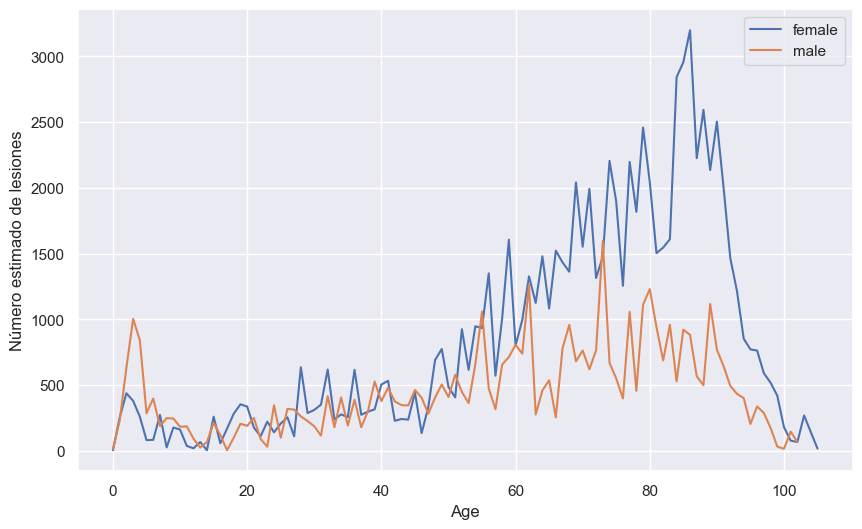

In [8]:

# Gráfica del número estimado de lesiones por edad y sexo
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary, x='age', y='weight', hue='sex')
plt.xlabel('Age')
plt.ylabel('Número estimado de lesiones')
plt.legend()
plt.show()


In [9]:

summary = summary.merge(population, on=['age', 'sex'])
summary['rate'] = (summary['weight'] / summary['population']) * 10000

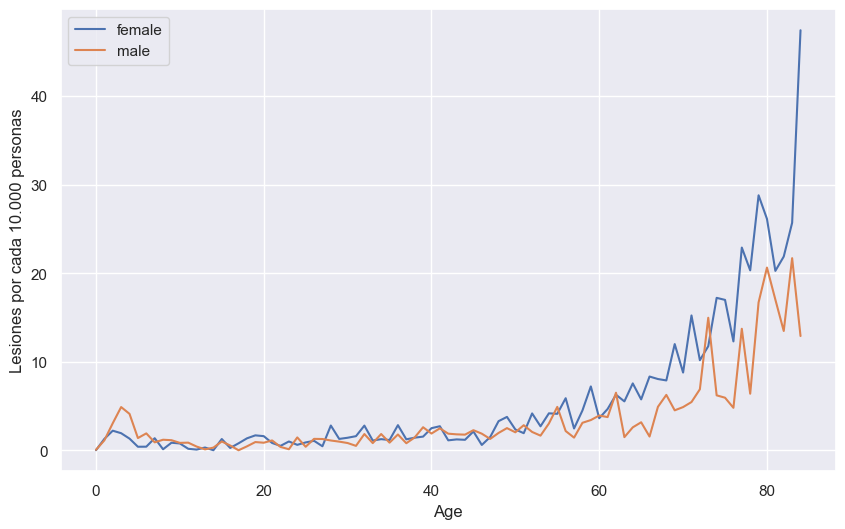

In [10]:
# Gráfico de líneas para la tasa de lesiones por edad y sexo
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary, x='age', y='rate', hue='sex')
plt.xlabel('Age')
plt.ylabel('Lesiones por cada 10.000 personas')
plt.legend()
plt.show()